In [1]:
%pylab inline
import os
import gc
import glob
import matplotlib
import numpy as np
import astropy.io.fits as pyfits
import astropy.table as astTab
import massmap_utilities as mutilities
from configparser import ConfigParser
from pixel3D import cartesianGrid3D

Populating the interactive namespace from numpy and matplotlib


In [17]:
configName  =   'wrkDir/config-nl20.ini'
parser      =   ConfigParser()
parser.read(configName)
gridInfo    =   cartesianGrid3D(parser)
outDir      =   'wrkDir/dnn_photoz/'

In [20]:
def plotPozAve(fieldname,pozBin,pozAve,oname):
    oname=os.path.join(outDir,oname)
    for i in range(0,10,1):
        plt.plot(pozBin,pozAve[i],label=r'zbin:%d' %(i+1))
    plt.xlim(-0.1,3)
    plt.legend()
    plt.xlabel('z',fontsize=15)
    plt.ylabel('PDF',fontsize=15)
    plt.title(fieldname)
    plt.grid()
    plt.tight_layout()
    plt.savefig(oname,overwrite=True)
    plt.close()
    return

nbin=100
for fieldname in mutilities.field_names:
    print(fieldname)
    fitsFname=os.path.join(outDir,'%s_dnnz_10_bins.fits' %fieldname)
    if not os.path.isfile(fitsFname):
        num=np.zeros(gridInfo.nz)
        poz_ave=np.zeros((gridInfo.nz,nbin))
        fnameL=glob.glob('datDir/catalog_tracts/%s_tracts/*_pz_pdf_dnnz.fits' %fieldname)
        for fname in fnameL:
            tract=fname.split('_pz')[0].split('/')[-1]
            pdfA=pyfits.getdata(fname)['PDF']
            catA=pyfits.getdata('datDir/catalog_tracts/%s_tracts/%s_pz.fits' %(fieldname,tract))
            mask=~np.any(np.isnan(pdfA),axis=1)
            pdfA=pdfA[mask]
            catA=catA[mask]
            poz_best=catA['dnnz_photoz_best']
            #print(tract,np.sum(~mask))
            # determine the average photo-z uncertainty
            for iz in range(gridInfo.nz):
                tmp_msk=(poz_best>=gridInfo.zbound[iz])&(poz_best<gridInfo.zbound[iz+1])
                poz_ave[iz,:]+=np.sum(pdfA[tmp_msk],axis=0)
                num[iz]+=np.sum(tmp_msk)
            if False:
                break
            else:
                del pdfA,mask
                gc.collect()
        poz_ave/=num[:,None]
        poz_ave/=np.sum(poz_ave,axis=1)[:,None]
        pyfits.writeto(fitsFname,poz_ave,overwrite=True)
    else:
        pozB=pyfits.getdata('datDir/catalog_tracts/GAMA09H_tracts/10040_pz_pdf_dnnz.fits',ext=2)['BINS']
        poz_ave=pyfits.getdata(fitsFname)
    plotPozAve(fieldname,pozB,poz_ave,'%s_dnnz_10_bins.png' %fieldname)
    if False:
        break

XMM
GAMA09H


/home/xiangchong/work/ana/lsstsw/miniconda/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  if sys.path[0] == '':
/home/xiangchong/work/ana/lsstsw/miniconda/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  if sys.path[0] == '':


WIDE12H
GAMA15H


/home/xiangchong/work/ana/lsstsw/miniconda/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  if sys.path[0] == '':
/home/xiangchong/work/ana/lsstsw/miniconda/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  if sys.path[0] == '':
/home/xiangchong/work/ana/lsstsw/miniconda/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  if sys.path[0] == '':


VVDS
HECTOMAP


/home/xiangchong/work/ana/lsstsw/miniconda/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  if sys.path[0] == '':


In [21]:
def plotLensKernel(fieldname,zcgrid,lensKernel1,lensKernel2,oname):
    oname=os.path.join(outDir,oname)
    cmap=plt.get_cmap('tab20')
    for i in range(0,20,2):
        norm1=np.sqrt(np.sum(lensKernel1[:,i]**2.))
        norm2=np.sqrt(np.sum(lensKernel2[:,i]**2.))
        plt.plot(zcgrid,lensKernel1[:,i]/norm1,'-',c=cmap(i))
        plt.plot(zcgrid,lensKernel2[:,i]/norm2,'--',c=cmap(i))
    plt.xlabel(r'$z_s$',fontsize=15)
    plt.ylabel('lensing kernel',fontsize=15)
    plt.grid()
    plt.title(fieldname)
    plt.tight_layout()
    plt.savefig(oname,overwrite=True)
    plt.close()
    return

pozB=pyfits.getdata('datDir/catalog_tracts/GAMA09H_tracts/10040_pz_pdf_dnnz.fits',ext=2)['BINS']
nbin=100
for fieldname in mutilities.field_names:
    print(fieldname)
    poz_ave=pyfits.getdata('%s_dnnz_10_bins.fits' %fieldname)
    lensKernel1= gridInfo.lensing_kernel()
    lensKernel2= gridInfo.lensing_kernel(poz_grids=pozB,poz_ave=poz_ave)
    plotLensKernel(fieldname,gridInfo.zcgrid,lensKernel1,lensKernel2,'%s_dnnz_10_bins_lensKer.png' %fieldname)

XMM
GAMA09H
WIDE12H


/home/xiangchong/work/ana/lsstsw/miniconda/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  
/home/xiangchong/work/ana/lsstsw/miniconda/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  
/home/xiangchong/work/ana/lsstsw/miniconda/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  


GAMA15H
VVDS
HECTOMAP


/home/xiangchong/work/ana/lsstsw/miniconda/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  
/home/xiangchong/work/ana/lsstsw/miniconda/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  
/home/xiangchong/work/ana/lsstsw/miniconda/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  


In [40]:
pdfA=pyfits.getdata('datDir/catalog_tracts/GAMA09H_tracts/10040_pz_pdf_dnnz.fits')['PDF']

In [41]:
np.sum(pdfA[0])

0.9951514

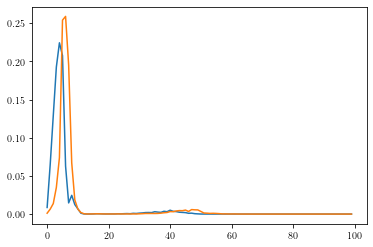

In [11]:
plt.plot(poz_ave[0])
plt.plot(poz_ave[1])

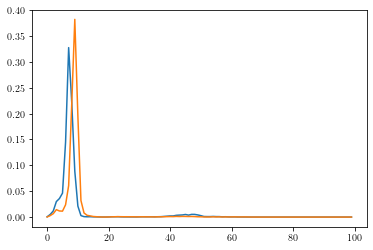

In [12]:
plt.plot(poz_ave[2])
plt.plot(poz_ave[3])

In [14]:
import cupy as cp
import cupyx.scipy.ndimage as ndimage

In [ ]:
a=cp.random.rand(5)
b=cp.random.rand(3)
ndimage.convolve1d(a, b, mode='constant')